
# DATA PREPARATION  
## Studi Kasus: Iris Flower Dataset

---

# Pendahuluan

## 3.1 Konsep Data Preparation dalam CRISP-DM

Data Preparation merupakan tahap ketiga dalam metodologi CRISP-DM setelah Business Understanding dan Data Understanding. 
Pada tahap ini data yang telah dipahami sebelumnya diproses lebih lanjut agar benar-benar siap digunakan 
untuk membangun model machine learning.

Tahap ini bertujuan untuk memastikan bahwa:

1. Data bersih dari kesalahan seperti duplikasi dan inkonsistensi.
2. Format data sesuai dengan kebutuhan algoritma.
3. Seluruh fitur memiliki skala yang sebanding.
4. Dataset akhir dapat langsung digunakan untuk proses modeling tanpa perlu pengolahan ulang.

Tanpa proses preparation yang baik, model dapat menghasilkan performa yang rendah atau bahkan bias.



# Persiapan Lingkungan Analisis

## 3.2 Import Library

Library yang digunakan dalam tahap ini:

- pandas → manipulasi data
- matplotlib → visualisasi distribusi
- sklearn.preprocessing → encoding dan scaling

Library ini dipilih karena umum digunakan dalam proses machine learning.


In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Membaca Dataset

## 3.3 Memuat Dataset Awal

Dataset dimuat kembali untuk memastikan seluruh proses preparation dilakukan pada data mentah yang konsisten.


In [2]:

df = pd.read_csv("IRIS.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Dataset terdiri dari empat fitur numerik dan satu label kategorikal (species).



# Pembersihan Data

## 3.4 Pemeriksaan Duplikasi

Duplikasi data dapat menyebabkan distribusi kelas tidak akurat dan memengaruhi evaluasi model.


In [3]:

print("Jumlah duplikasi sebelum:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah duplikasi sesudah:", df.duplicated().sum())


Jumlah duplikasi sebelum: 3
Jumlah duplikasi sesudah: 0



Jika hasil akhir menunjukkan nilai 0, maka dataset telah bersih dari duplikasi.



## 3.5 Pemeriksaan Missing Value

Missing value dapat menyebabkan error dalam algoritma machine learning.


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Dataset tidak memiliki missing value sehingga tidak memerlukan proses imputasi.



# Transformasi Data

## 3.6 Encoding Label

Karena algoritma machine learning memerlukan data numerik, 
maka label species perlu dikonversi menjadi bentuk numerik menggunakan LabelEncoder.


In [5]:

le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0



Kolom species_encoded kini merepresentasikan label dalam bentuk angka.



# Seleksi Fitur

## 3.7 Pemisahan Fitur dan Target

Dataset dipisahkan menjadi:

- X → fitur input
- y → target klasifikasi


In [6]:

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species_encoded']
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



# Standarisasi Fitur

## 3.8 Alasan Dilakukan Scaling

Scaling penting untuk algoritma berbasis jarak seperti KNN karena 
fitur dengan rentang lebih besar dapat mendominasi perhitungan jarak.


In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357



Setelah scaling, seluruh fitur memiliki mean sekitar 0 dan standar deviasi sekitar 1.



# Visualisasi Sebelum dan Sesudah Scaling


## 3.9 Sebelum Scaling

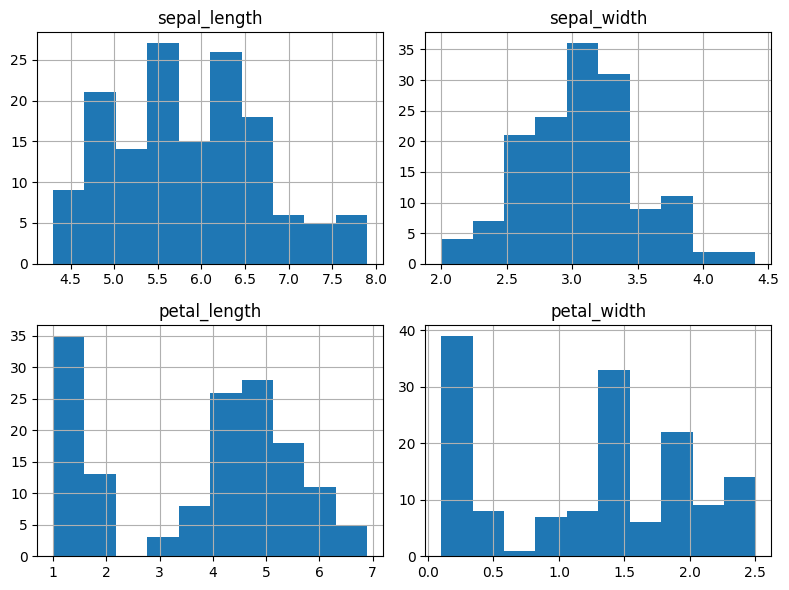

In [8]:

X.hist(figsize=(8,6))
plt.tight_layout()
plt.show()


## 3.10 Sesudah Scaling

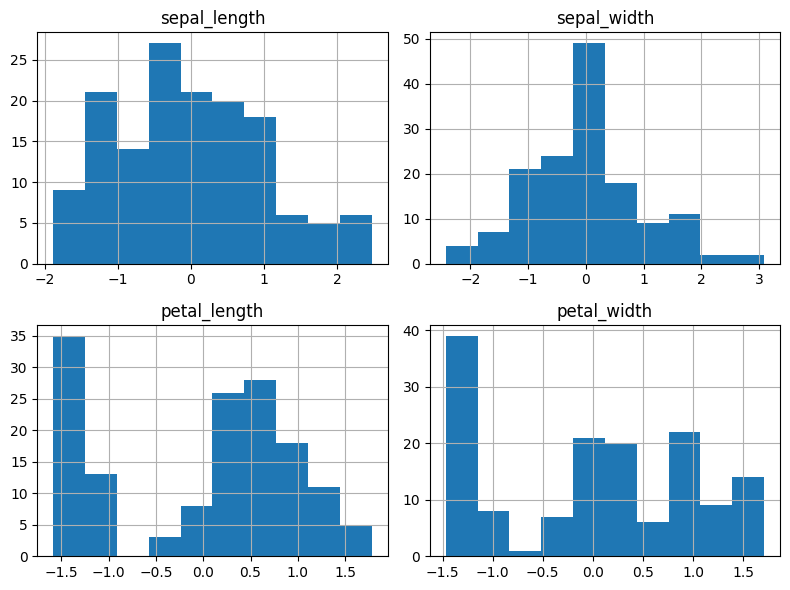

In [9]:

pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(8,6))
plt.tight_layout()
plt.show()



Distribusi setelah scaling terlihat lebih terpusat dan seragam.



# Menyimpan Dataset Final untuk Modeling


In [10]:

df_modeling = pd.DataFrame(X_scaled, columns=X.columns)
df_modeling['target'] = y
df_modeling.to_csv("IRIS_after_preparation_for_modeling.csv", index=False)
df_modeling.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.915509,1.019971,-1.357737,-1.3357,0.0
1,-1.157560,-0.128082,-1.357737,-1.3357,0.0
2,-1.399610,0.331139,-1.414778,-1.3357,0.0
3,-1.520635,0.101529,-1.300696,-1.3357,0.0
4,-1.036535,1.249582,-1.357737,-1.3357,0.0



Dataset ini kini siap digunakan untuk tahap Modeling tanpa perlu pengolahan tambahan.
